In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

170498071/170498071 [==============================] - 24s 0us/step


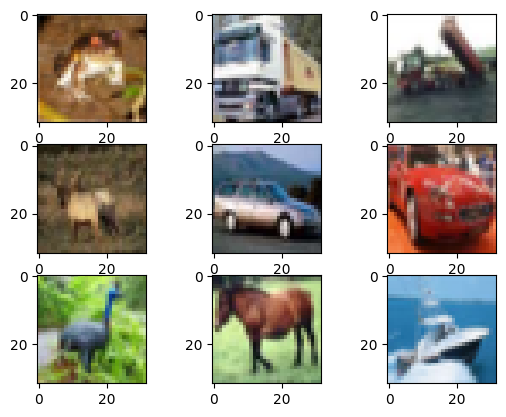

In [4]:
# Plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i])
plt.show()


In [5]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(96, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Fourth Convolutional Layer
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Fifth Convolutional Layer
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Flattening and Fully Connected Layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 26s 13ms/step - loss: 1.6764 - accuracy: 0.3801 - val_loss: 1.3662 - val_accuracy: 0.4988
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2675 - accuracy: 0.5440 - val_loss: 1.1426 - val_accuracy: 0.5883
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1055 - accuracy: 0.6061 - val_loss: 1.0435 - val_accuracy: 0.6295
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9967 - accuracy: 0.6492 - val_loss: 0.9640 - val_accuracy: 0.6665
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9199 - accuracy: 0.6796 - val_loss: 0.9338 - val_accuracy: 0.6747
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8480 - accuracy: 0.7045 - val_loss: 0.9136 - val_accuracy: 0.6878
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8037 - accuracy: 0.7204 - val_loss: 0.9006 -

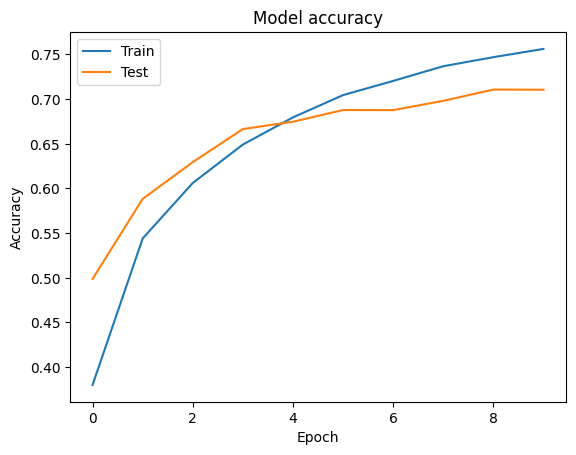

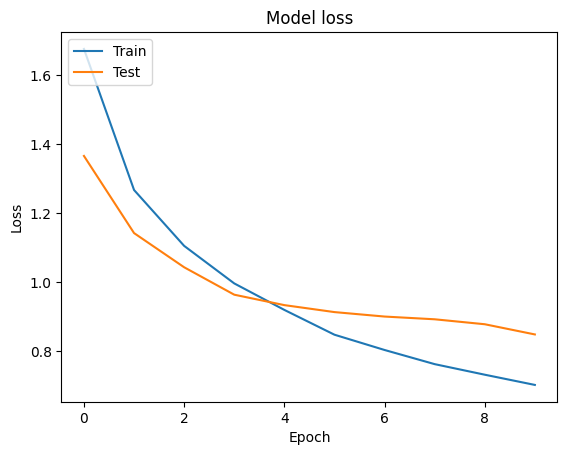

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
model.save('alexnet_cifar10.h5')